# King County House Prise Prediction

Bu projede King County WA da ev fiyatlarını regression ile tahmin eden modeli geliştireceğiz.
Data Kaggle projesinden alınmıs
This dataset contains house sale prices for King County, which includes Seattle. It includes homes sold between May 2014 and May 2015.

Data Dictionary
id :a notation for a house

date: Date house was sold

price: Price is prediction target

bedrooms: Number of Bedrooms/House

bathrooms: Number of bathrooms/bedrooms

sqft_living: square footage of the home

sqft_lot: square footage of the lot

floors :Total floors (levels) in house

waterfront :House which has a view to a waterfront

view: Has been viewed

condition :How good the condition is Overall

grade: overall grade given to the housing unit, based on King County grading system

sqft_above :square footage of house apart from basement

sqft_basement: square footage of the basement

yr_built :Built Year

yr_renovated :Year when house was renovated

zipcode:zip code

lat: Latitude coordinate

long: Longitude coordinate

sqft_living15 :Living room area in 2015(implies-- some renovations) This might or might not have affected the lotsize area

sqft_lot15 :lotSize area in 2015(implies-- some renovations)

<img src='https://www.racialequityalliance.org/wp-content/uploads/2016/10/assessors_social-1.jpg'>
<a href='https://www.kaggle.com/code/shiv28/house-price-prediction-in-king-county-usa' target=_blank>Data dosyasini burada bulabilirsiniz</a>

### Gerekli paketleri import ediyoruz

In [1]:
import pandas as pd # Data dosyalarini okuma paketi
pd.set_option("display.max_columns",55)

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import Ridge, Lasso, ElasticNet
import numpy as np

In [2]:
import warnings
warnings.filterwarnings('ignore')

### Import data

In [3]:
df=pd.read_csv('kc_house_data.csv')

In [4]:
ls

 Volume in drive C has no label.
 Volume Serial Number is A4DA-3C75

 Directory of C:\Users\elifs\Documents\AI\Day 03

21.02.2024  14:10    <DIR>          .
07.02.2024  23:43    <DIR>          ..
18.02.2024  19:59    <DIR>          .ipynb_checkpoints
18.02.2024  02:13           141.824 cars.xls
18.02.2024  02:13           732.191 combine .csv
18.02.2024  20:40         5.566.120 Day3 - Regression.ipynb
18.02.2024  02:13             5.533 heightweight.csv
21.02.2024  14:10            17.735 House Price Prediction.ipynb
18.02.2024  02:14         2.515.206 kc_house_data.csv
18.02.2024  20:56           145.380 King County Home Price Prediction.ipynb
18.02.2024  02:14               312 PastHires.csv
18.02.2024  02:15         1.529.169 sales.csv
15.02.2024  23:34    <DIR>          Visualization Assignment
               9 File(s)     10.653.470 bytes
               4 Dir(s)  221.410.263.040 bytes free


In [5]:
pwd

'C:\\Users\\elifs\\Documents\\AI\\Day 03'

### EDA - Exploratory Data Analaysis - Keşifsel Veri Analizi

In [6]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [7]:
df.tail()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287
21612,1523300157,20141015T000000,325000.0,2,0.75,1020,1076,2.0,0,0,3,7,1020,0,2008,0,98144,47.5941,-122.299,1020,1357


In [8]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [9]:
df['bedrooms'].mean()+3*df['bedrooms'].std()

6.1610271165396

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [11]:
df.corr(numeric_only=True)

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.000000,-0.016762,0.001286,0.005160,-0.012258,-0.132109,0.018525,-0.002721,0.011592,-0.023783,0.008130,-0.010842,-0.005151,0.021380,-0.016907,-0.008224,-0.001891,0.020799,-0.002901,-0.138798
price,-0.016762,1.000000,0.308350,0.525138,0.702035,0.089661,0.256794,0.266369,0.397293,0.036362,0.667434,0.605567,0.323816,0.054012,0.126434,-0.053203,0.307003,0.021626,0.585379,0.082447
bedrooms,0.001286,0.308350,1.000000,0.515884,0.576671,0.031703,0.175429,-0.006582,0.079532,0.028472,0.356967,0.477600,0.303093,0.154178,0.018841,-0.152668,-0.008931,0.129473,0.391638,0.029244
bathrooms,0.005160,0.525138,0.515884,1.000000,0.754665,0.087740,0.500653,0.063744,0.187737,-0.124982,0.664983,0.685342,0.283770,0.506019,0.050739,-0.203866,0.024573,0.223042,0.568634,0.087175
sqft_living,-0.012258,0.702035,0.576671,0.754665,1.000000,0.172826,0.353949,0.103818,0.284611,-0.058753,0.762704,0.876597,0.435043,0.318049,0.055363,-0.199430,0.052529,0.240223,0.756420,0.183286
sqft_lot,-0.132109,0.089661,0.031703,0.087740,0.172826,1.000000,-0.005201,0.021604,0.074710,-0.008958,0.113621,0.183512,0.015286,0.053080,0.007644,-0.129574,-0.085683,0.229521,0.144608,0.718557
floors,0.018525,0.256794,0.175429,0.500653,0.353949,-0.005201,1.000000,0.023698,0.029444,-0.263768,0.458183,0.523885,-0.245705,0.489319,0.006338,-0.059121,0.049614,0.125419,0.279885,-0.011269
waterfront,-0.002721,0.266369,-0.006582,0.063744,0.103818,0.021604,0.023698,1.000000,0.401857,0.016653,0.082775,0.072075,0.080588,-0.026161,0.092885,0.030285,-0.014274,-0.041910,0.086463,0.030703
view,0.011592,0.397293,0.079532,0.187737,0.284611,0.074710,0.029444,0.401857,1.000000,0.045990,0.251321,0.167649,0.276947,-0.053440,0.103917,0.084827,0.006157,-0.078400,0.280439,0.072575
condition,-0.023783,0.036362,0.028472,-0.124982,-0.058753,-0.008958,-0.263768,0.016653,0.045990,1.000000,-0.144674,-0.158214,0.174105,-0.361417,-0.060618,0.003026,-0.014941,-0.106500,-0.092824,-0.003406


In [12]:
df.shape

(21613, 21)

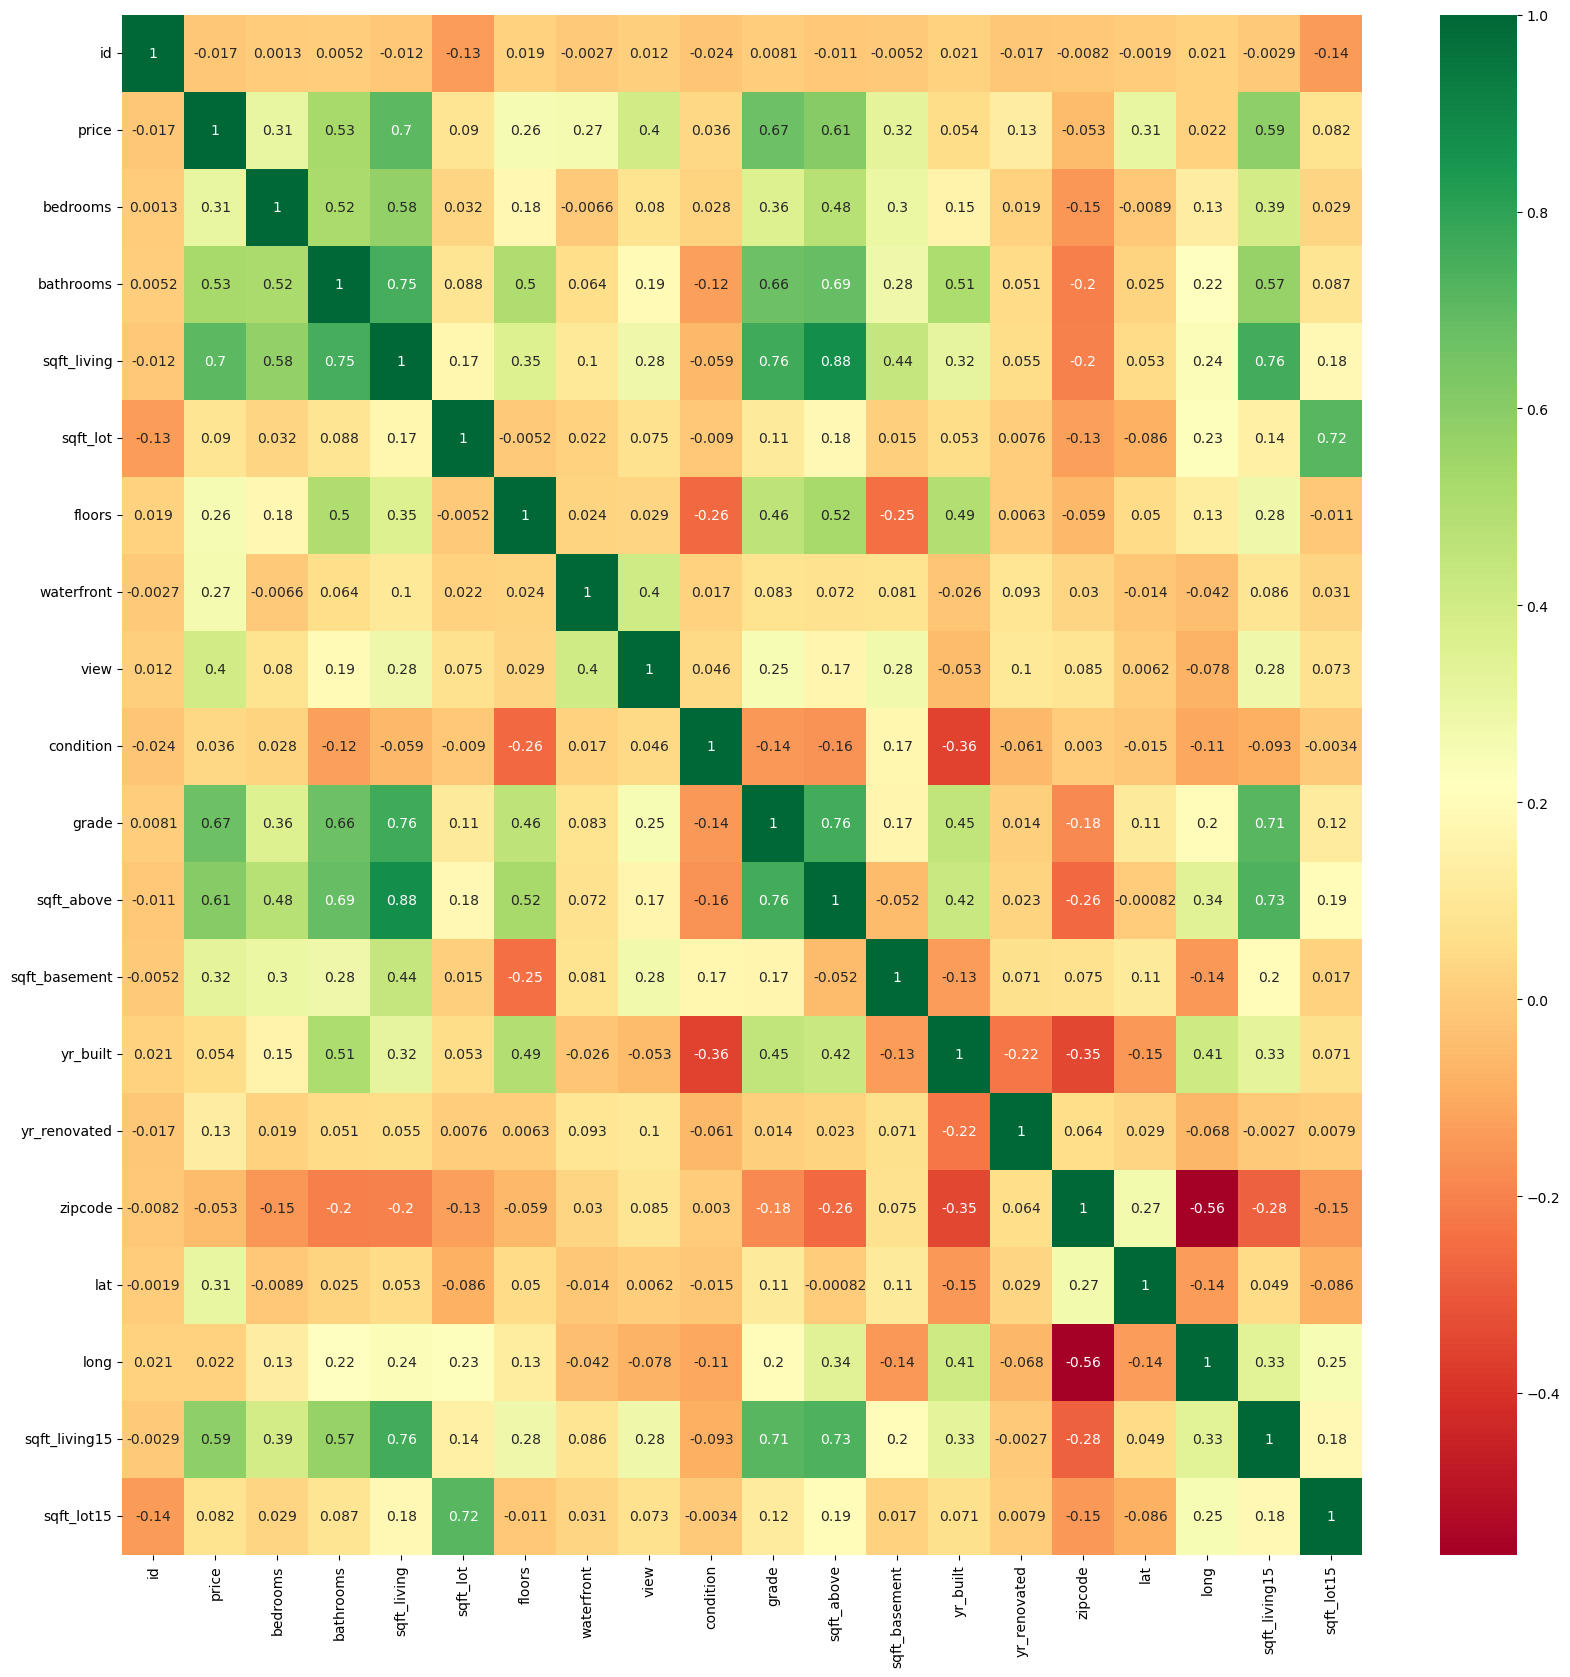

In [13]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(numeric_only=True),annot=True, cmap='RdYlGn');

In [14]:
abs(df.corr(numeric_only=True)['price']).sort_values(ascending=False)

price            1.000000
sqft_living      0.702035
grade            0.667434
sqft_above       0.605567
sqft_living15    0.585379
bathrooms        0.525138
view             0.397293
sqft_basement    0.323816
bedrooms         0.308350
lat              0.307003
waterfront       0.266369
floors           0.256794
yr_renovated     0.126434
sqft_lot         0.089661
sqft_lot15       0.082447
yr_built         0.054012
zipcode          0.053203
condition        0.036362
long             0.021626
id               0.016762
Name: price, dtype: float64

<Axes: xlabel='bedrooms'>

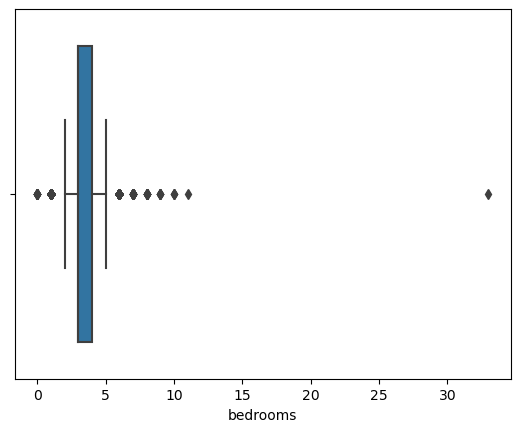

In [15]:
sns.boxplot(x=df['bedrooms'])

<Axes: xlabel='bathrooms'>

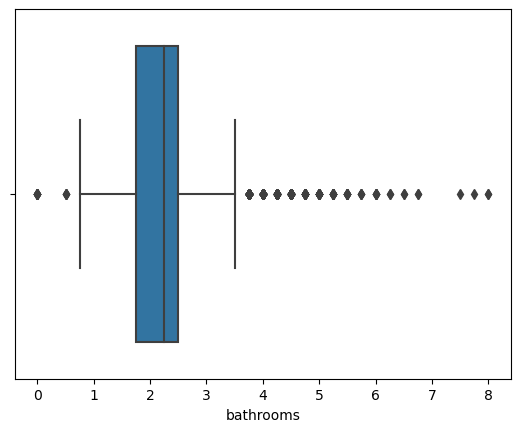

In [16]:
sns.boxplot(x=df['bathrooms'])

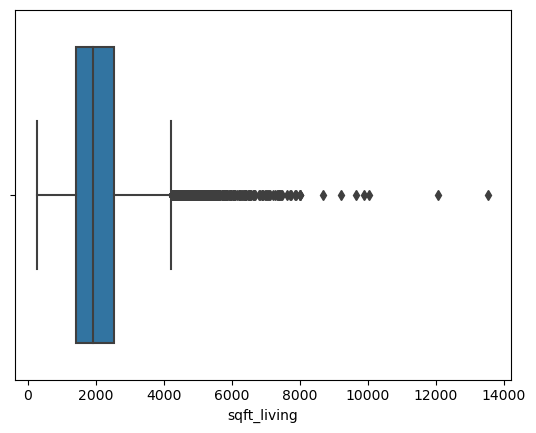

In [17]:
sns.boxplot(x=df['sqft_living']);

In [18]:
df['zipcode']=df['zipcode'].astype('category')

<Axes: xlabel='bedrooms', ylabel='Density'>

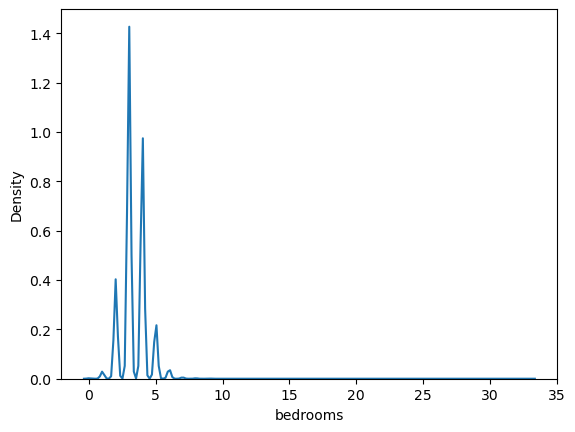

In [19]:
sns.kdeplot(x=df['bedrooms'])

<Axes: xlabel='bedrooms', ylabel='Count'>

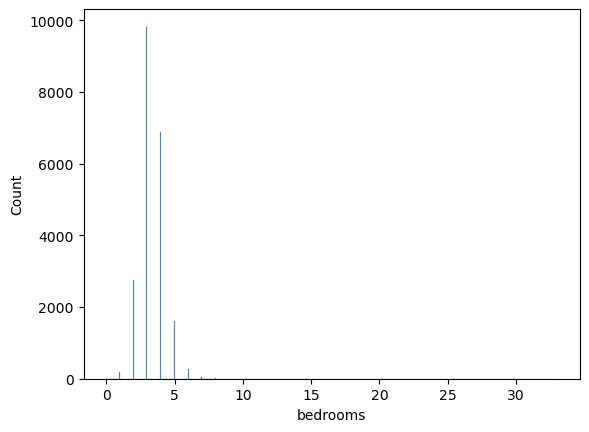

In [20]:
sns.histplot(x=df['bedrooms'])

<Axes: xlabel='price', ylabel='Count'>

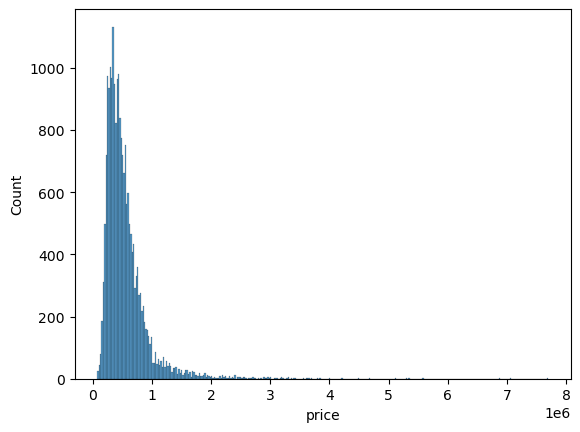

In [21]:
sns.histplot(x=df['price'])

In [22]:
outliers=df.quantile(q=.97,numeric_only=True)

In [23]:
df=df[(df['price']<outliers['price'])]
df=df[(df['bedrooms']<outliers['bedrooms'])]
df=df[(df['bathrooms']<outliers['bathrooms'])]
df=df[(df['sqft_living']<outliers['sqft_living'])]

<Axes: xlabel='price', ylabel='Count'>

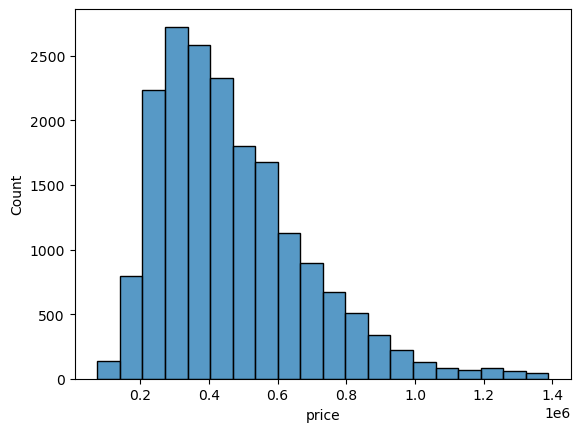

In [24]:
sns.histplot(x=df['price'], bins=20)

<Axes: xlabel='bathrooms', ylabel='Count'>

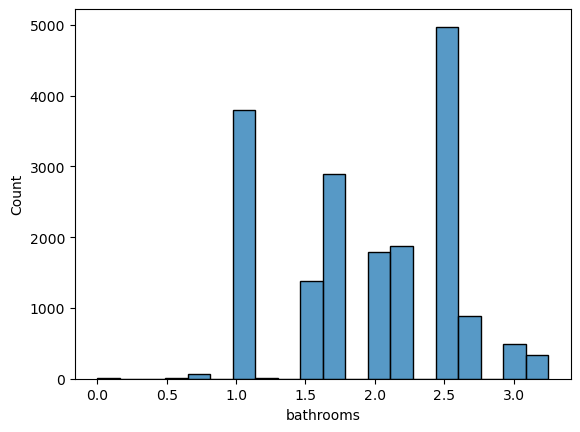

In [25]:
sns.histplot(x=df['bathrooms'], bins=20)

<Axes: xlabel='bedrooms'>

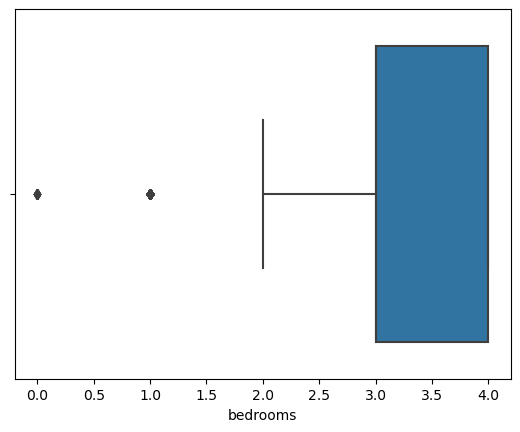

In [26]:
sns.boxplot(x=df['bedrooms'])

### Feature Engineering

In [27]:
df['zipcode']=df['zipcode'].astype('category')

In [28]:
df['bedrooms']=df['bedrooms']**2
df['bathrooms']=df['bathrooms']**2
df['sqft_living']=df['sqft_living']**2

In [29]:
import datetime

In [30]:
df['age']=datetime.datetime.now().year -df['yr_built']

In [31]:
#df['age']=2024-df['yr_built']

In [32]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,age
0,7129300520,20141013T000000,221900.0,9,1.0000,1392400,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,69
1,6414100192,20141209T000000,538000.0,9,5.0625,6604900,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,73
2,5631500400,20150225T000000,180000.0,4,1.0000,592900,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,91
3,2487200875,20141209T000000,604000.0,16,9.0000,3841600,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,59
4,1954400510,20150218T000000,510000.0,9,4.0000,2822400,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,37


In [33]:
import numpy as np

In [34]:
df['yr_renovated']=np.where(df['yr_renovated']>0,1,0)
df['sqft_basement']=np.where(df['sqft_basement']>0,1,0)

In [35]:
x=df.drop(['id','date','lat','long','price'],axis=1)
y=df[['price']]  

In [36]:
x=pd.get_dummies(x,drop_first=True)

In [37]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=42)

### Modelling

In [38]:
lr=LinearRegression()

In [39]:
lr.fit(x_train,y_train)

LinearRegression()

In [40]:
tahmin=lr.predict(x_test)

In [41]:
r2_score(y_test,tahmin)

0.8314604632681526

In [42]:
mean_squared_error(y_test,tahmin)**.5

87443.19391379716

In [43]:
# Sonuç Hedef R2>.80 ve RMSE <$100K Mission Accomplished


In [44]:
R=Ridge()

In [45]:
R.fit(x_train,y_train)

Ridge()

In [46]:
tahmin2=R.predict(x_test)

In [47]:
mean_squared_error(y_test,tahmin2)**.5

87654.71387513958

In [48]:
r2_score(y_test,tahmin2)

0.8306441025728581

### Feature Importance

In [49]:
feature_importance=pd.DataFrame({'Feature':x_train.columns,'Coefs':lr.coef_[0]})

In [50]:
feature_importance=feature_importance.sort_values(by='Coefs',ascending=False)

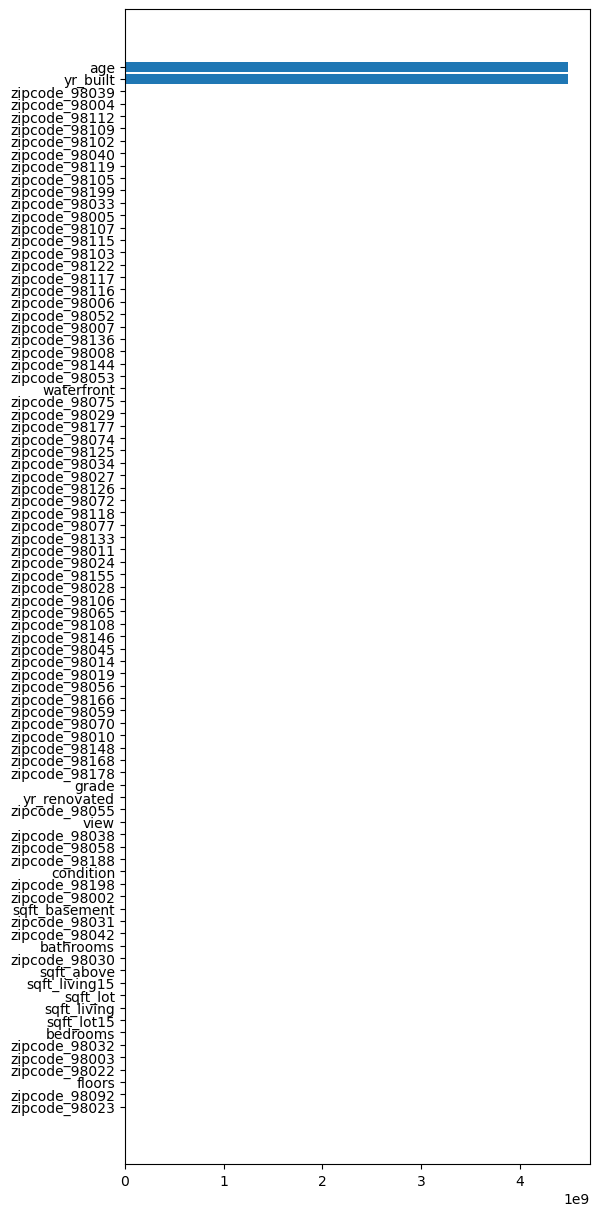

In [51]:
import matplotlib.pyplot as plt
plt.figure(figsize=(6,15))
plt.barh(feature_importance['Feature'], feature_importance['Coefs'])
plt.gca().invert_yaxis()

In [52]:
residuals=y_test-tahmin

<Axes: ylabel='Count'>

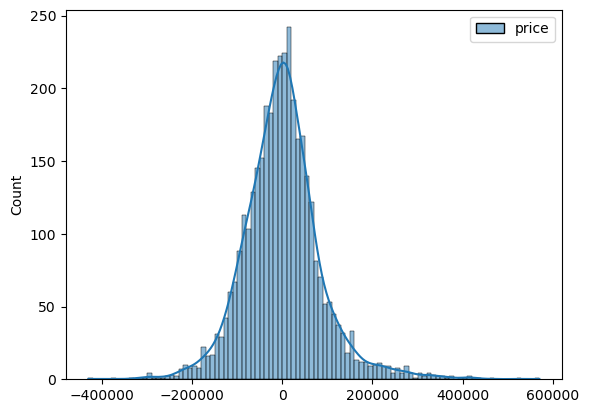

In [53]:
sns.histplot(residuals, kde=True,bins=100)

<Axes: xlabel='price', ylabel='Density'>

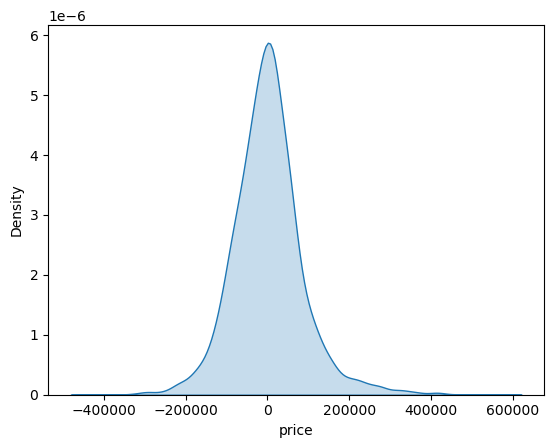

In [54]:
sns.kdeplot(x=residuals['price'],fill=True)

In [55]:
pip install xgboost

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [58]:
#Do Not Repeat Yourself DRY

In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
pd.set_option("display.max_columns",100)

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge,Lasso
from sklearn.linear_model import ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import ExtraTreeRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error


def algo_test(x,y):
        #Bütün modelleri tanımlıyorum
        L=LinearRegression()
        R=Ridge()
        Lass=Lasso()
        E=ElasticNet()
        ETR=ExtraTreeRegressor()
        GBR=GradientBoostingRegressor()
        kn=KNeighborsRegressor()
        dt=DecisionTreeRegressor()
        xgb=XGBRegressor()
       
        
        algos=[L,R,Lass,E,ETR,GBR,kn,dt,xgb]
        algo_names=['Linear','Ridge','Lasso','ElasticNet','Extra Tree','Gradient Boosting','KNeighborsRegressor','Decision Tree','XGBRegressor']
        
        x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=.2,random_state=42)
        
        r_squared= []
        rmse= []
        mae= []
        
        #Hata ve doğruluk oranlarını bir tablo haline getirmek için bir dataframe oluşturuyorum
        result=pd.DataFrame(columns=['R_Squared','RMSE','MAE'],index=algo_names)
        
        
        for algo in algos:
            p=algo.fit(x_train,y_train).predict(x_test)
            r_squared.append(r2_score(y_test,p))
            rmse.append(mean_squared_error(y_test,p)**.5)
            mae.append(mean_absolute_error(y_test,p))
        
            

        #result adlı tabloya doğruluk ve hata oranlarımı yerleştiriyorum
        result.R_Squared=r_squared
        result.RMSE=rmse
        result.MAE=mae
        
       #oluşturduğum result tablosunu doğruluk oranına (r2_score) göre sıralayıp dönüyor
        rtable=result.sort_values('R_Squared',ascending=False)
        return rtable

In [57]:
algo_test(x,y)

,R_Squared,RMSE,MAE
XGBRegressor,0.842439,84547.143342,59470.452421
Linear,0.831460,87443.193914,62911.770937
Lasso,0.831447,87446.738611,62907.022363
Ridge,0.830644,87654.713875,63086.346449
Gradient Boosting,0.751655,106145.737472,80363.755270
Extra Tree,0.648591,126264.580945,85290.697084
Decision Tree,0.579055,138193.511127,94109.756479
ElasticNet,0.563314,140753.644536,108692.627414
KNeighborsRegressor,0.350574,171648.410156,129871.865767
